## Phase 2.19.1

# Multiple Regression

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a _function_ only of a single independent variable, here we'll be taking the dependent variable to be a _function_ of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\large \hat{y} = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')

In [2]:
df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**What are the features/predictors?**

*TV:* advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

*Radio:* advertising dollars spent on Radio

*Newspaper:* advertising dollars spent on Newspaper

**What is the target?**

*Sales:* sales of a single product in a given market (in thousands of widgets)

### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: 
> ***On the basis of this data, how should we spend our advertising money in the future?***

This general question might lead you to more specific questions:

* Is there a relationship between ads and sales?
* How strong is that relationship?
* Which ad types contribute to sales?
* What is the effect of each ad type of sales?
* Given ad spending in a particular market, can sales be predicted?

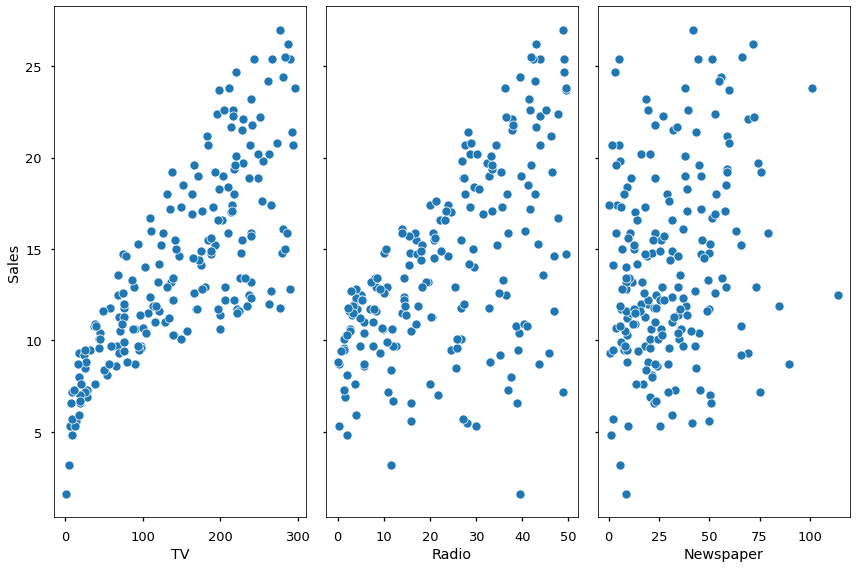

In [3]:
# Visualize dataset.
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(12,8))
sns.scatterplot(x='TV', y='Sales', data=df, ax=ax1)
sns.scatterplot(x='Radio', y='Sales', data=df, ax=ax2)
sns.scatterplot(x='Newspaper', y='Sales', data=df, ax=ax3)
fig.tight_layout()

## Simple Regression Modeling

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
f = 'Sales~TV'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.47e-42
Time:                        17:24:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression in sklearn

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
# Create X and y 
features = ['TV']
x = df[features] # Lower case `x` for a single dimensional array.
y = df['Sales']

# Instiatiate and fit 
linreg = LinearRegression()
linreg.fit(x, y)

# Print coefficients 
print(linreg.intercept_)
print(linreg.coef_)

7.032593549127695
[0.04753664]


## Multiple Regression Modeling
We are still predicting a single variable (y) but now we are using multiple features (X). This introduces several additional complexities but it also provides a great deal of additional flexibility and predictability.

In [8]:
# Statsmodels
f = 'Sales~TV+Radio+Newspaper'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        17:24:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### _Note_: R-squared vs. Adjusted R-squared 
To evaluate the overall fit of a linear model, we use the R-squared value

R-squared is the proportion of variance explained
It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model
The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
R-squared is between 0 and 1
Higher values are better because it means that more variance is explained by the model.

The actual calculation of $R^2$ is:
$\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation is in the dependent variable your model explains.

Adjusted $R^2$
There are some theoretical objections to using $R^2$ as an evaluator of a regression model.

One objection is that, if we add another predictor to our model, $R^2$ can only increase! (It could hardly be that with more features I'd be able to account for less of the variation in the dependent variable than I could with the smaller set of features. We saw this with adding Newspaper ads.)

One improvement is adjusted $R^2$:
$\Large R^2_{adj.}\equiv 1 - \frac{(1 - R^2)(n - 1)}{n - m - 1}$, where:

n is the number of data points; and
m is the number of predictors.
This can be a better indicator of the quality of a regression model.

R-squared will always increase as you add more features to the model, even if they are unrelated to the response
Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

**Solution**

* Adjusted R-squared
Penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.

**Better Solution**

* Train/test split or cross-validation
More reliable estimate.
Better for choosing which of your models will best generalize to other data.
There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models.
Cross-validation can be applied to any model, whereas the methods described above only apply to linear models. 

## In Sklearn

In [9]:
# Sklearn
features = ['TV', 'Radio', 'Newspaper']
X = df[features] # Capital `X` for multidimensional arrays.
y = df['Sales']

linreg = LinearRegression() # instantiate 
linreg.fit(X, y) # fit 

print(linreg.coef_)
print(linreg.score(X,y))

# adjusted R-squared
print(1 - (1 - linreg.score(X, y)) * (len(y) - 1) / (len(y) - X.shape[1] - 1))

[ 0.04576465  0.18853002 -0.00103749]
0.8972106381789522
0.8956373316204668


In [10]:
# Zip together coefficients.
list(zip(features, linreg.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

## Dealing with Multicollinearity
The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. Multicollinearity occurs when 2 or more of the independent variables are highly correlated with each other.

**How do we tell if variables are correlated with each other?**
1. Use `variance_inflation_factor()`
2. Look at a scatter matrix 
3. Look at a heatmap 

### VIF

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

> *The variance inflation factor is a measure for the increase of the
variance of the parameter estimates if an additional variable, given by
exog_idx is added to the linear regression. It is a measure for
multicollinearity of the design matrix, exog.*
>
> ***One recommendation is that if VIF is greater than 5, then the explanatory
variable given by exog_idx is highly collinear with the other explanatory
variables***, *and the parameter estimates will have large standard errors
because of this.*


***Important***
- **When using VIF, you must include an intercept (constant column) for the results of this test to be accurate.**

In [12]:
X_const = sm.add_constant(X)
X_const.head()

,const,TV,Radio,Newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4


In [13]:
X_const.values[:5]

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4]])

In [14]:
# Demo to check VIF for column_idx `i`.
variance_inflation_factor(X_const.values, 1)

1.00461078493965

In [15]:
# Creating VIF Dictionary.
vif_dct = {}

# Loop through each row and set the variable name to the VIF. 
for i in range(len(X_const.columns)):
    vif = variance_inflation_factor(X_const.values, i)
    v = X_const.columns[i]
    vif_dct[v] = vif

vif_dct

{'const': 6.848899953334954,
 'TV': 1.00461078493965,
 'Radio': 1.1449519171055353,
 'Newspaper': 1.1451873787239288}

In [16]:
# X_const['Tv(2)'] = X_const['TV'] + 10

# # Creating VIF Dictionary.
# vif_dct = {}

# # Loop through each row and set the variable name to the VIF. 
# for i in range(len(X_const.columns)):
#     vif = variance_inflation_factor(X_const.values, i)
#     v = X_const.columns[i]
#     vif_dct[v] = vif

# vif_dct

In [17]:
X

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [18]:
vif_dct = {}

# Loop through each row and set the variable name to the VIF. 
for i in range(len(X.columns)):
    vif = variance_inflation_factor(X.values, i)
    v = X.columns[i]
    vif_dct[v] = vif

vif_dct

{'TV': 2.486771835198193,
 'Radio': 3.285462100162896,
 'Newspaper': 3.0552445106573853}

### Scatter Matrix

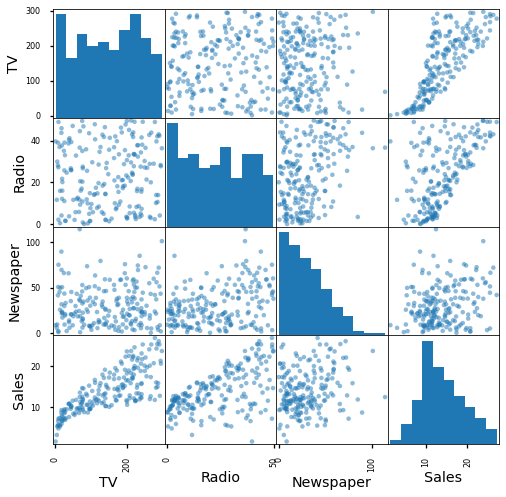

In [19]:
pd.plotting.scatter_matrix(df, figsize=(8,8));

### Heatmap

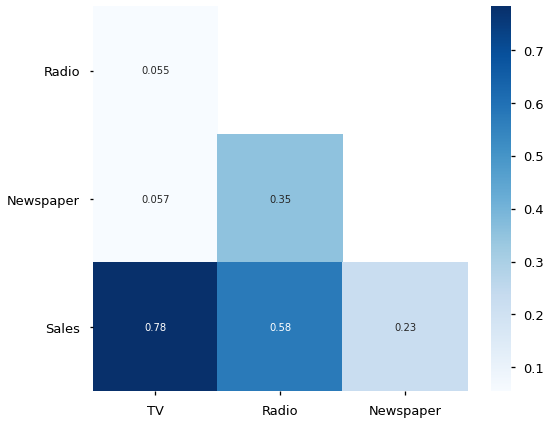

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

corr = (
    df
    .corr()
    .abs()
    .round(3)
)

# Set a 'mask' for the upper half of the heatmap. 
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, annot=True, mask=mask, cmap='Blues', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",)
plt.setp(ax.get_yticklabels(), rotation=0)

# Fix the cutoff squares and remove empty row and column. 
ax.set_ylim(len(corr), 1)
ax.set_xlim(xmax=len(corr)-1)

fig.tight_layout()

**The heatmap returns a matrix with the Pearson Correlation Coefficient given for each variable. Typically, we want to pay attention to a variable that has a high (~0.7 or higher) correlation with another predictive feature but a lower correlation with the target.**

# Feature Engineering

- *Feature Engineering* is a very large subject and requires domain knowledge, creativity, and coding ability (execution).

For a simple demonstration, let's create a simple categorical column for this dataset based on an existing feature.

In [21]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [22]:
# Creating column based on quartiles.
newspaper_cut = pd.qcut(X['Newspaper'], 3, labels=['Low', 'Mid', 'High'])
X['Newspaper_Cat'] = newspaper_cut
X

,TV,Radio,Newspaper,Newspaper_Cat
1,230.1,37.8,69.2,High
2,44.5,39.3,45.1,High
3,17.2,45.9,69.3,High
4,151.5,41.3,58.5,High
5,180.8,10.8,58.4,High
...,...,...,...,...
196,38.2,3.7,13.8,Low
197,94.2,4.9,8.1,Low
198,177.0,9.3,6.4,Low
199,283.6,42.0,66.2,High


*We will spend more time looking at Feature Engineering when we talk **Extensions to Linear Models**.*

# Preprocessing Considerations
There are two important preprocessing techniques to consider when working with Linear Models (and other model-types as well!).
1. One-Hot-Encoding
2. Scaling / Normalization

## One-Hot-Encoding
- When we prepare our data for modeling, all data needs to be numeric, however we are going to often come across 
    - *Models don't know how to interpret any value that is non-numeric.*
- *One-Hot-Encoding (OHE) is a technique that transforms a non-numerical feature into several binary features based on the values in the original.*
    
For example:

| x_0 | 
| --- |
| apple |
| banana|
| apple |
| peach |

*Afer OHE*

| x_0_apple | x_0_banana | x_0_peach |
| --- | --- | --- |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 0 | 0 | 1 |

---

*A note on **Label Encoding**:*
- Label Encoding (assigning a numeric label to each category in a categorical feature) is often very popular, but as a general rule should not be used when transforming categorical columns to numeric columns.

Label Encoding Example:

| x_0 | 
| --- |
| apple |
| banana|
| apple |
| peach |

*After LE*

| x_0_encoded | 
| --- |
| 0 |
| 1|
| 0 |
| 2 |

*What is the not-so-subtle drawback to using this technique? (Hint: Think mathematically.)*

In [23]:
# Example: Using `pd.get_dummies()`
pd.get_dummies(X['Newspaper_Cat'], drop_first=True)

,Mid,High
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
196,0,0
197,0,0
198,0,0
199,0,1


**Why do we drop a category (`drop_first`) when we are using Linear Regression models?**

---

*While very convenient, this is a big mistake and causes problems very quickly. We will go over this more in detail when we are talking Model Validation.*

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
# Preferred way of one-hot-encoding!
ohe = OneHotEncoder(drop='first', sparse=False)
newspaper_ohe = ohe.fit_transform(X[['Newspaper_Cat']])
newspaper_ohe[:5, :]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [26]:
ohe.get_feature_names()

array(['x0_Low', 'x0_Mid'], dtype=object)

In [27]:
num_cols = (
    X.drop('Newspaper_Cat', axis=1)
    .reset_index(drop=True) # Resetting the index to line up data.
)
cat_cols = (
    pd.DataFrame(newspaper_ohe, columns=ohe.get_feature_names())
    .reset_index(drop=True) # Resetting the index to line up data.
)

X_preprocessed = pd.concat([num_cols, cat_cols], axis=1)
X_preprocessed

,TV,Radio,Newspaper,x0_Low,x0_Mid
0,230.1,37.8,69.2,0.0,0.0
1,44.5,39.3,45.1,0.0,0.0
2,17.2,45.9,69.3,0.0,0.0
3,151.5,41.3,58.5,0.0,0.0
4,180.8,10.8,58.4,0.0,0.0
...,...,...,...,...,...
195,38.2,3.7,13.8,1.0,0.0
196,94.2,4.9,8.1,1.0,0.0
197,177.0,9.3,6.4,1.0,0.0
198,283.6,42.0,66.2,0.0,0.0


In [28]:
# Housekeeping: align the index coordinating X and y indices.
y = y.reset_index(drop=True)

In [29]:
X_preprocessed.shape, y.shape

((200, 5), (200,))

## Scaling the Data
- We can use the data as it is, and create a `statsmodels` table to inspect our results...

### Unscaled Features

In [30]:
# Unscaled features.
model = sm.OLS(y, sm.add_constant(X_preprocessed)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     340.5
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.65e-94
Time:                        17:24:09   Log-Likelihood:                -385.70
No. Observations:                 200   AIC:                             783.4
Df Residuals:                     194   BIC:                             803.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2967      0.789      4.176      0.000       1.740       4.854
TV             0.0458      0.001     32.677      0.000       0.043       0.049
Radio          0.1894      0.009     20.946      0.000       0.172       0.207
Newspaper     -0.0079      0.012     -0.654      0.514      -0.032       0.016
x0_Low        -0.4230      0.644     -0.657      0.512      -1.693       0.848
x0_Mid        -0.0699      0.476     -0.147      0.883      -1.008       0.868
==============================================================================
Omnibus:                       58.892   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.439
Skew:                          -1.309   Prob(JB):                     1.17e-31
Kurtosis:                       6.200   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We can see the `coef` values vary dramatically from the numerical features to the categorical features. 
- This is because of the scale of the features are *very different*.
    - The `coef` is telling us: *How much does $\large y$ change when $\large x_i$ increases by 1.*
    - While this is very important to understand (in concrete figures), it *does not* help us compare the **relative importance** of the features we are modeling.

If we want to compare one feature to the others and extract relative importance, we need to scale the data into standard units.
- Z-Score! 
    - Sklearn: *`StandardScaler`*
    
    

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Scaling the data for all the features into standard deviation units.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_preprocessed.columns)
X_scaled_df

,TV,Radio,Newspaper,x0_Low,x0_Mid
0,0.969852,0.981522,1.778945,-0.717741,-0.693889
1,-1.197376,1.082808,0.669579,-0.717741,-0.693889
2,-1.516155,1.528463,1.783549,-0.717741,-0.693889
3,0.052050,1.217855,1.286405,-0.717741,-0.693889
4,0.394182,-0.841614,1.281802,-0.717741,-0.693889
...,...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,1.393261,-0.693889
196,-0.617035,-1.240003,-1.033598,1.393261,-0.693889
197,0.349810,-0.942899,-1.111852,1.393261,-0.693889
198,1.594565,1.265121,1.640850,-0.717741,-0.693889


*Note: It is sometimes best **not to** scale OHE-columns, and it is other times best to. For this example, we are scaling these columns.*

### Scaled Features

In [33]:
# Scaled features.
model = sm.OLS(y, sm.add_constant(X_scaled_df)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     340.5
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.65e-94
Time:                        17:24:09   Log-Likelihood:                -385.70
No. Observations:                 200   AIC:                             783.4
Df Residuals:                     194   BIC:                             803.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.120    117.334      0.000      13.787      14.258
TV             3.9195      0.120     32.677      0.000       3.683       4.156
Radio          2.8045      0.134     20.946      0.000       2.540       3.069
Newspaper     -0.1726      0.264     -0.654      0.514      -0.693       0.348
x0_Low        -0.2004      0.305     -0.657      0.512      -0.802       0.401
x0_Mid        -0.0327      0.223     -0.147      0.883      -0.472       0.407
==============================================================================
Omnibus:                       58.892   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.439
Skew:                          -1.309   Prob(JB):                     1.17e-31
Kurtosis:                       6.200   Cond. No.                         5.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Interpreting***
- We can now see a completely different model summary.
    - The $R^2$, Adjusted $R^2$, and p-values are the same from the two models.
    - The coefficients are very different from the models however!
    - We can now interpret our results in a very different way - comparing the relative importance (`coef` value) between different features.
        - ***As $x_i$ increases by one standard deviation, how much does $y$ change?***

## Within Sklearn

In [34]:
linreg = LinearRegression()
linreg.fit(X_scaled_df, y)

LinearRegression()

In [35]:
linreg.coef_

array([ 3.91949504,  2.80445657, -0.17264109, -0.20037537, -0.03274437])

In [36]:
linreg.intercept_

14.0225